# Forecasting Demand for Products : in this project I'm doing Forecasting demand for BIKES for rentals

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#uploading .csv file
from google.colab import files


uploaded = files.upload()

Saving Forecasting Demand for Bikes.csv to Forecasting Demand for Bikes.csv


In [3]:
#loading dataset in a variable
data = pd.read_csv('Forecasting Demand for Bikes.csv')

In [4]:
#describes summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


*   instant: ID
*   dteday: Date
*   season: 1-4
*   yr: year
*   mnth: month:1-12
*   holiday: 0-No,1-Yes
*   workingday:0-No,1-Yes
*   weathersit: weather situation 1-sunny 2-cloudy 3-rainny
*   temp: temperature on that day
*   atemp: average temperature on that day
*   hum: humidity
*   windspeed: speed of the wind on that day
*   causal: casual usage
*   registered: registered usage
*   cnt: total of casual and registered


In [5]:
#summary in terms of mean , meadian , statistical terms
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#for diaplaying top rows
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
#last rows for dataset
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [8]:
#shape of dataset  #rows and columns
data.shape

(730, 16)

In [9]:
#changing date (object ) to date and time
data["dteday"] = pd.to_datetime(data["dteday"])


<ipython-input-9-98dba2371dc0>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["dteday"] = pd.to_datetime(data["dteday"])


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

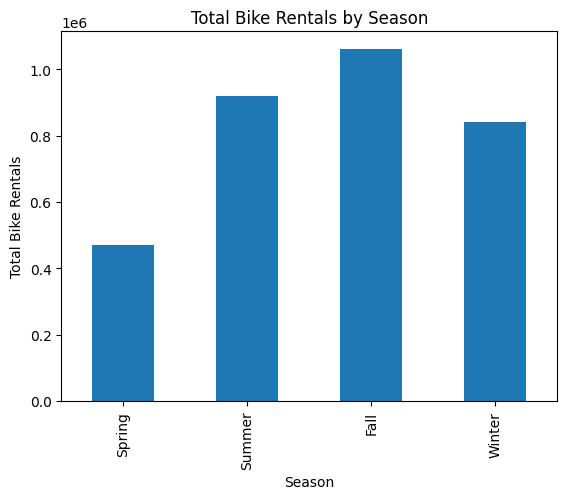

In [11]:
season_counts = data.groupby("season")["cnt"].sum()
season_counts.plot(kind="bar", x="Season", y="Count")
plt.xlabel("Season")
plt.ylabel("Total Bike Rentals")
plt.title("Total Bike Rentals by Season")
plt.xticks(range(4), ["Spring", "Summer", "Fall", "Winter"])
plt.show()

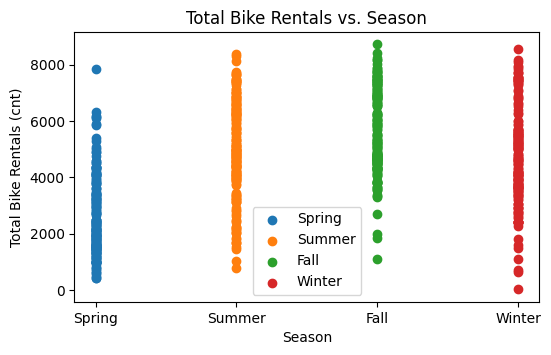

In [12]:
seasons_numbers = [1, 2, 3, 4]
season_names = ["Spring", "Summer", "Fall", "Winter"]

plt.figure(figsize=(6, 3.5))
for i in range(len(seasons_numbers)):
    season_data = data[data['season'] == seasons_numbers[i]]
    plt.scatter(season_data['season'], season_data['cnt'], label=season_names[i])

plt.xlabel("Season")
plt.ylabel("Total Bike Rentals (cnt)")
plt.title("Total Bike Rentals vs. Season")
plt.xticks(seasons_numbers, season_names)
plt.legend()
plt.show()

Linear regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
x = data[['season']]
y = data['cnt']

In [15]:
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [16]:
y_pred = lr.predict(x)

In [17]:
lr.predict([[1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3450.66370383])

In [18]:
lr.intercept_

2745.123944967556

In [19]:
lr.coef_

array([705.53975887])

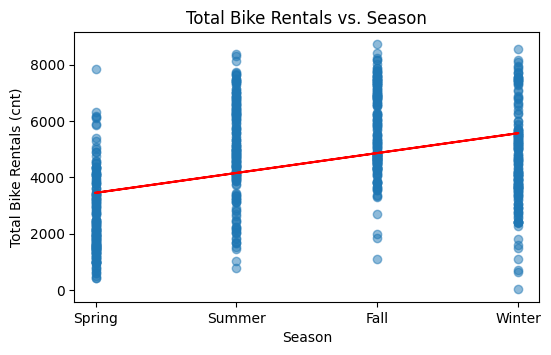

In [20]:
plt.figure(figsize=(6, 3.5))
plt.scatter(data['season'], data['cnt'], alpha=0.5)
plt.plot(x, y_pred, color='red')
plt.xlabel("Season")
plt.ylabel("Total Bike Rentals (cnt)")
plt.title("Total Bike Rentals vs. Season")
plt.xticks(range(1, 5), ["Spring", "Summer", "Fall", "Winter"])

plt.show()

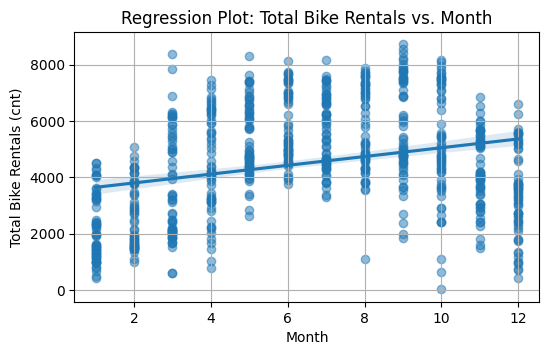

In [21]:
plt.figure(figsize=(6, 3.5))
sns.regplot(data=data, x='mnth', y='cnt', scatter_kws={'alpha':0.5})
plt.xlabel("Month")
plt.ylabel("Total Bike Rentals (cnt)")
plt.title("Regression Plot: Total Bike Rentals vs. Month")
plt.grid(True)
plt.show()

<Axes: xlabel='cnt'>

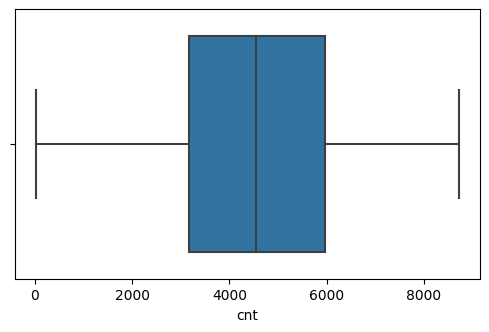

In [22]:
plt.figure(figsize=(6, 3.5))
sns.boxplot(data=data, x = "cnt")

In [23]:
from sklearn.model_selection import train_test_split as tts

xtrain, xtest, ytrain, ytest = tts(x,y, train_size = 0.75)

In [24]:
xtrain.shape,xtest.shape, ytrain.shape

((547, 1), (183, 1), (547,))

#logistic regression

In [25]:
import random
import numpy as np

outcomes = ["Yes", "No"]
random.seed(30)
marks1 = np.array([random.randint(30,100) for _ in range(10)]).reshape(-1,1)
out_comes = [random.choice(outcomes) for _ in range(10)]

In [26]:
marks1,out_comes

(array([[99],
        [67],
        [33],
        [56],
        [62],
        [36],
        [80],
        [78],
        [47],
        [40]]),
 ['No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No'])

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(marks1, out_comes)


LogisticRegression()

In [28]:
lr.coef_

array([[-0.07468181]])

In [29]:
lr.intercept_

array([5.01180976])

In [30]:
lr.predict([[40]])

array(['Yes'], dtype='<U3')

polynomial regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly = PolynomialFeatures(degree=2)
x_copy = poly.fit_transform(x)

In [33]:
X = poly.fit_transform(data[['season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']])
y = data['cnt']

In [34]:
model = LinearRegression()

In [35]:
model.fit(X, y)

LinearRegression()

In [36]:
print(model.coef_)


[-3.37673230e+13  1.42305590e+03  6.47985550e+02  2.25597820e+02
 -1.23829557e+03  2.38600115e+02  9.73822622e+02  2.57503480e+03
 -2.02134052e+03  1.58096424e+02  1.11916331e+02 -3.52897301e+02
  3.09022400e+02 -1.21559514e+01  5.58433655e+01 -7.58831505e+01
 -2.47058053e+01  8.31509347e+01 -7.66731526e+01  1.38699723e+01
 -1.53595285e+00  6.47985550e+02 -3.25740071e+01  9.01484010e+01
 -1.23198078e+02 -8.49567411e+01 -3.35101685e+02  3.40382015e+02
 -1.38968877e+01 -4.74788205e+00 -7.99237985e+00  4.43316786e+01
  4.30700096e+01 -8.88622463e+01 -9.14985771e+01  8.81700771e+01
 -3.85754638e+00  4.42702985e+00 -1.23829557e+03  0.00000000e+00
  5.42285694e+02  5.33474406e+02 -4.32292286e+02  7.72014100e+00
 -4.05476158e+01  2.38600115e+02  1.27359825e+02 -4.71286554e+02
  4.25234989e+02 -1.66087085e+01 -3.42489485e+00 -2.76261700e+02
  2.52901875e+02 -2.20811262e+02  3.38263223e+00  3.36599146e+00
 -4.63714214e+00 -2.91441259e+01 -9.53323878e+00 -2.25463184e+01
  2.24173204e+01  8.42812

In [37]:
y_pred = model.predict(X)

In [38]:
# Evaluate the model
print('Model score:')
print(model.score(X, y))

Model score:
0.8614185236961941


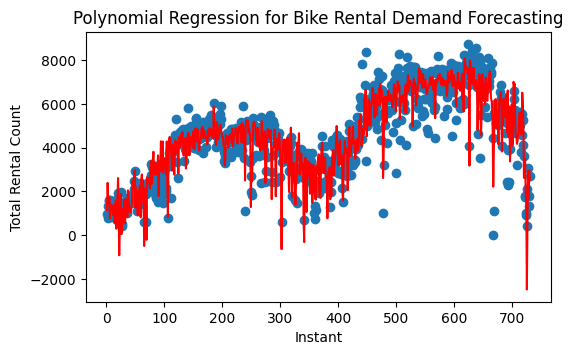

In [39]:
plt.figure(figsize=(6, 3.5))
plt.scatter(data['instant'], data['cnt'])
plt.plot(data['instant'], y_pred, color='red')
plt.xlabel('Instant')
plt.ylabel('Total Rental Count')
plt.title('Polynomial Regression for Bike Rental Demand Forecasting')
plt.show()

Gaussian Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
features = data[['season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
target = data['cnt']

In [42]:
model = GaussianNB()
model.fit(features, target)

GaussianNB()

In [43]:
predictions = model.predict(features)
# Find the index of the maximum predicted value
max_index = np.argmax(predictions)
print( predictions[max_index])

8714


In [44]:
# Make predictions
predictions = model.predict(features)
# Evaluate the model
print('Model score:')
print(model.score(features, target))

Model score:
0.9726027397260274


# svm

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [46]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y, train_size = 0.75)

In [47]:
sv2 = SVC().fit(xtrain,ytrain)

In [48]:
y_pred = sv2.predict(xtest)

In [49]:
features = data [['season', 'yr', 'mnth', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
target =   data ['cnt']

In [50]:
model = SVC()


In [51]:
model.fit(features, target)
predictions = model.predict(features)

In [52]:
print('Model score:')
print(model.score(features, target))

Model score:
0.024657534246575342


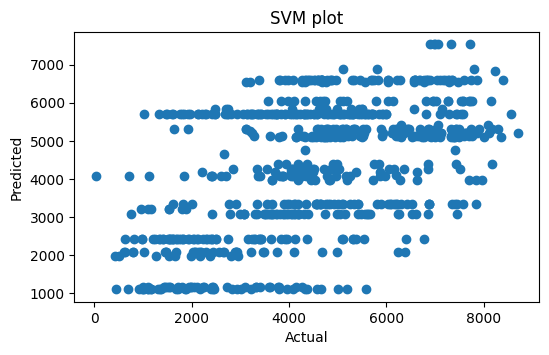

In [53]:
plt.figure(figsize=(6, 3.5))
plt.scatter(target, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM plot')
plt.show()

# conclusion :


from the above regressions and clasifications we can conclude that the forecasting demand for bike rentals , based on season , year and weather conditions like temperature , humidity , windspeed the FALL season has more demand for bikes . And the September, October, November are high demand for the bikes . in the above project we applied linear , logistic , polynomial , gausian navie bayes , svm  regressions and predict the demand of bikes.